<a href="https://colab.research.google.com/github/cotozelo/Data_Science_Machine_Learning_-_Data_ICMC/blob/main/Notebooks/Classificacao_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DBSCAN

Esse notebook, teve sua inspiração a <a href="https://www.youtube.com/watch?v=o6txmOn2IUk&list=PLFE-LjWAAP9R4G0WOXWuha4P5cCvw7hGB&index=2">Aula 01</a>. Mas durante a aula foram tratados somentes conceituação "teórica". Para um melhor entendimento da prática, busquei outras fontes. 

* Classificação não supervisonada
* Baseado na densidade dos dados
* Identifica outliers
* Principais parâmetros:
  * Eps: maior distância entre dois vizinhos, para pertencer ao mesmo cluster. Valor padrão 0.1.
  * min_samples: número mínimo de amostras em uma vizinhança para que uma dada amostra seja uma amostra do tipo core (ou interna).

## Exemplo 01 - **Iris**
<a href="https://www.youtube.com/watch?v=SSFd6UHjxII">ref.</a>

###imports


In [ ]:
import pandas as pd
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split

###Set

In [ ]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

###Dataset

In [ ]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['class'] = iris.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X = df_iris.iloc[:, :-1].values
y = df_iris.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f'Tamanhos do X de treino {X_train.shape}')
print(f'Tamanhos do y de treino {y_train.shape}')

print(f'Tamanhos do X de teste {X_test.shape}')
print(f'Tamanhos do y de teste {y_test.shape}')

Tamanhos do X de treino (120, 4)
Tamanhos do y de treino (120,)
Tamanhos do X de teste (30, 4)
Tamanhos do y de teste (30,)


###O modelo - DBSCAN

In [ ]:
modelo = DBSCAN(eps=0.8, min_samples=19)
modelo.fit(X)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=19, n_jobs=None, p=None)

###Encontrar outliers

In [ ]:
df_outliers = pd.DataFrame(data=X)
print(Counter(modelo.labels_))
print(df_outliers[modelo.labels_==-1])

Counter({1: 94, 0: 50, -1: 6})
       0    1    2    3
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0


Text(0.5, 1.0, 'DBSCAN for outliers')

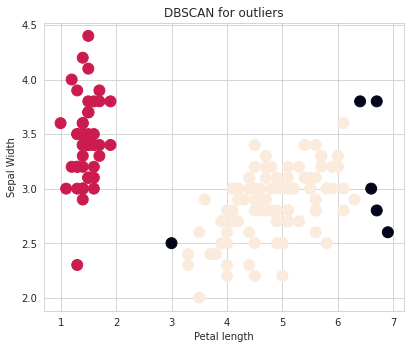

In [ ]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])
colors = modelo.labels_
ax.scatter(X[:,2], X[:,1], c=colors, s=120)
ax.set_xlabel('Petal length')
ax.set_ylabel('Sepal Width')
plt.title('DBSCAN for outliers')

##Exemplo 02 - Dados de Cartão de Crédito

<a href="https://www.kaggle.com/arjunbhasin2013/ccdata">dataset</a>

###imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
  
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

###dataset

In [ ]:
#antes precisa subir o dataset no colab, link na descrição do exemplo
data = pd.read_csv('CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


A coluna CUST_ID é irrelevante para o problema então vamos retira-la

In [ ]:
data = data.drop('CUST_ID', axis = 1)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


###Tratamento dos dados

Pela amostra dos dados acima vimos que os dados contém NA's. Para corrigir isso vamos preencher os dados faltantes com o último dado valido.

In [ ]:
data.fillna(method ='ffill', inplace = True)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Normalização

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3053336 ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08714014,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10010994,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32935392,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34057185,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.32688396,
        -0.52555097, -4.12276757]])

In [ ]:
data_normal = normalize(data_scaled)  
data_normal

array([[-0.31203754, -0.10633067, -0.18112923, ..., -0.13015974,
        -0.22403554,  0.153753  ],
       [ 0.21992844,  0.03753912, -0.13122357, ...,  0.02435267,
         0.06545835,  0.1007975 ],
       [ 0.1266835 ,  0.14678487, -0.03050485, ..., -0.02836341,
        -0.14890049,  0.10218868],
       ...,
       [-0.15698874, -0.03932717, -0.08522984, ..., -0.06983386,
         0.06980122, -0.8741623 ],
       [-0.15433414, -0.03841436, -0.09724958, ..., -0.07053634,
         0.0681811 , -0.85387249],
       [-0.11521665, -0.17889603,  0.00848081, ..., -0.06577735,
        -0.1057542 , -0.82960552]])

In [ ]:
df_data_normal = pd.DataFrame(data_normal, columns=data.columns)
df_data_normal.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.312038,-0.106331,-0.181129,-0.152156,-0.148808,-0.198985,-0.343796,-0.289304,-0.301518,-0.287892,-0.202942,-0.217975,-0.409413,-0.225497,-0.130160,-0.224036,0.153753
1,0.219928,0.037539,-0.131224,-0.099751,-0.127038,0.728177,-0.341439,-0.189662,-0.256269,0.160403,0.030762,-0.165387,0.192455,0.228782,0.024353,0.065458,0.100798
2,0.126684,0.146785,-0.030505,0.030851,-0.128792,-0.132251,0.359775,0.757449,-0.259805,-0.191342,-0.134881,-0.030888,0.234046,-0.108741,-0.028363,-0.148900,0.102189
3,0.020571,-0.426063,0.097223,0.228832,-0.190449,-0.154451,-0.424878,-0.167299,-0.384185,-0.108474,-0.138062,-0.231084,0.346093,-0.250827,-0.041942,-0.220185,0.151110
4,-0.151630,0.218959,-0.195282,-0.146778,-0.192118,-0.197278,-0.428601,-0.168765,-0.387551,-0.285424,-0.201202,-0.233109,-0.382671,-0.153993,-0.110323,-0.222114,0.152435


###Reduzindo a dimensão

In [ ]:
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(df_data_normal)
data_pca

array([[-0.4899491 , -0.67997641],
       [-0.51909869,  0.54482676],
       [ 0.3306331 ,  0.2688797 ],
       ...,
       [ 0.1888176 , -0.24815531],
       [-0.31309306, -0.17111148],
       [ 0.01284082,  0.09842325]])

In [ ]:
df_data_pca = pd.DataFrame(data_pca)
df_data_pca.columns = ['P1', 'P2']
df_data_pca.head()

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544827
2,0.330633,0.268880
3,-0.481656,-0.097611
4,-0.563512,-0.482506


###O modelo DBSCAN

In [ ]:
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(df_data_pca)
labels = db_default.labels_

###Resultados

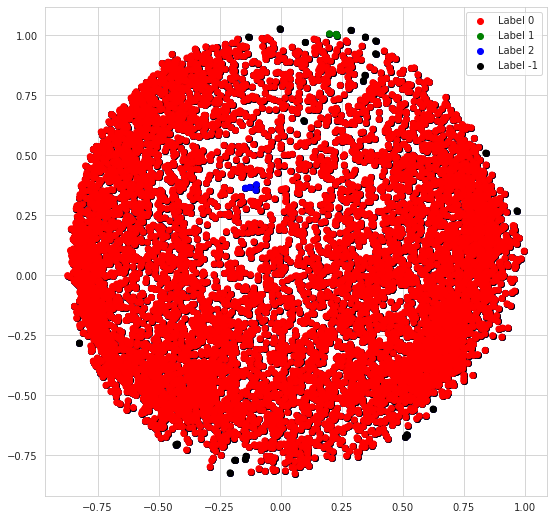

In [ ]:
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
  
cvec = [colours[label] for label in labels]

plt.figure(figsize =(9, 9))

r = plt.scatter(df_data_pca['P1'], df_data_pca['P2'], color ='r');
g = plt.scatter(df_data_pca['P1'], df_data_pca['P2'], color ='g');
b = plt.scatter(df_data_pca['P1'], df_data_pca['P2'], color ='b');
k = plt.scatter(df_data_pca['P1'], df_data_pca['P2'], color ='k');

plt.scatter(df_data_pca['P1'], df_data_pca['P2'], c = cvec)
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()

###Ajustando os parâmetros

In [ ]:
db = DBSCAN(eps = 0.0375, min_samples = 50).fit(df_data_pca)
labels1 = db.labels_

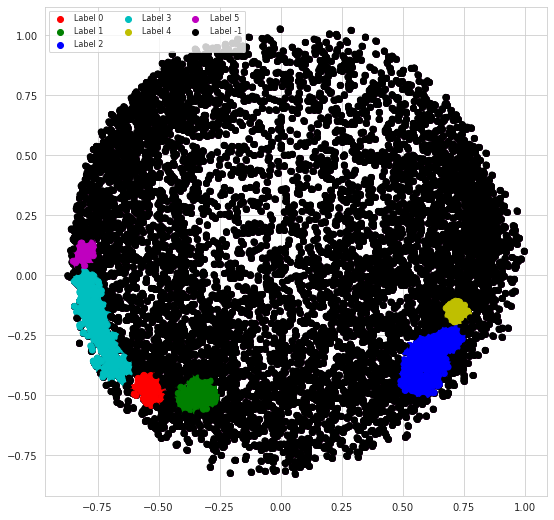

In [ ]:
colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
  
cvec = [colours1[label] for label in labels1]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ]
  
plt.figure(figsize =(9, 9))

r = plt.scatter(df_data_pca['P1'], df_data_pca['P2'], marker ='o', color = colors[0])
g = plt.scatter(df_data_pca['P1'], df_data_pca['P2'], marker ='o', color = colors[1])
b = plt.scatter(df_data_pca['P1'], df_data_pca['P2'], marker ='o', color = colors[2])
c = plt.scatter(df_data_pca['P1'], df_data_pca['P2'], marker ='o', color = colors[3])
y = plt.scatter(df_data_pca['P1'], df_data_pca['P2'], marker ='o', color = colors[4])
m = plt.scatter(df_data_pca['P1'], df_data_pca['P2'], marker ='o', color = colors[5])
k = plt.scatter(df_data_pca['P1'], df_data_pca['P2'], marker ='o', color = colors[6])
  
plt.scatter(df_data_pca['P1'], df_data_pca['P2'], c = cvec)
plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'),
           scatterpoints = 1,
           loc ='upper left',
           ncol = 3,
           fontsize = 8)
plt.show()